# Performing Data Enrichment

The `arcgis.geoanalytics.data_enrichment` submodule contains functions that are used for data enrichment using geoanalytics

<h2>Table of contents</h2>
    
- [Enrich From Grid](#Enrich-From-Grid)
- [Calculate Motion Statistics](#Calculate-Motion-Statistics)

This toolset uses distributed processing to complete analytics on your GeoAnalytics Server.

<table>
  <tr>
    <th><center>Tool</center></th>
    <th><center>Description</center></th>    
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-enrich-from-multi-variable-grid.htm"><p align="left">enrich_from_grid</p></a></td>
      <td><p align="left"> The Enrich From Multi-Variable Grid tool joins attributes from a multivariable grid to a point layer. </p></td>
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-calculate-motion-statistics.htm"><p align="left">calculate_motion_statistics</p></a></td>
      <td><p align="left">The Calculate Motion Statistics tool calculates motion statistics and descriptors for time-enabled points that represent one or more moving entities. The time-enabled point data must include features that represent an instant in time.</p></td>
  </tr>
  <tr>

**Note**: The purpose of the notebook is to show examples of the different tools that can be run on an example dataset.

In [2]:
# connect to Enterprise GIS
from arcgis.gis import GIS
import arcgis.geoanalytics

portal_gis = GIS("your_enterprise_profile")

In [3]:
search_result1 = portal_gis.content.search("bigDataFileShares_hurricanes", item_type = "big data file share")[0]
search_result1

<Item title:"bigDataFileShares_all_hurricanes" type:Big Data File Share owner:admin>

In [5]:
search_result2 = portal_gis.content.search("bigDataFileShares_ServiceCallsOrleans", item_type = "big data file share")[0]
search_result2

<Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:portaladmin>

In [6]:
calls = search_result1.layers[0]

In [4]:
grid_item = portal_gis.content.get('f61cf232eecb49f89a089aedbcc55c51')
grid_item

<Item title:"build_multivariable_grid" type:Feature Layer Collection owner:arcgis_python>

In [7]:
grid_lyr = grid_item.layers[0]

## Enrich From Grid

The [`enrich_from_grid`](https://developers.arcgis.com/rest/services-reference/enterprise/enrich-from-multi-variable-grid.htm) tool joins attributes from a multivariable grid to a point layer. The multivariable grid must be created using the `build_multivariable_grid` task. Metadata from the multivariable grid is used to efficiently enrich the input point features, making it faster than the Join Features task. Attributes in the multivariable grid are joined to the input point features when the features intersect the grid.

The attributes in the multivariable grid can be used as explanatory variables when modeling spatial relationships with your input point features, and this task allows you to join those attributes to the point features quickly.

<center><img src="../../static/img/guide_img/ga/enrich_from_grid.png" height="300" width="300"></center>

In [2]:
from arcgis.geoanalytics.data_enrichment import enrich_from_grid

In [8]:
enrich_from_grid(calls, grid_lyr, output_name='enrich from grid test') 

Attaching log redirect
Log level set to DEBUG
Detaching log redirect


<Item title:"enrich_from_grid_test" type:Feature Layer Collection owner:arcgis_python>

## Calculate Motion Statistics

The Calculate Motion Statistics tool calculates motion statistics and descriptors for time-enabled points that represent one or more moving entities. The time-enabled point data must include features that represent an instant in time.

<center><img src="../../static/img/guide_img/ga/calculate_motion_statistics.png" height="300" width="300"></center>

Points are grouped together into tracks representing each entity using a unique identifier. Motion statistics are calculated at each point using one or more points in the track history. Calculations include summaries of distance traveled, duration, elevation, speed, acceleration, bearing, and idle status. The result is a new point layer enriched with the requested statistics.

For example, a city could be monitoring snowplow operations and want to better understand vehicle movement. The Calculate Motion Statistics tool could be used to determine idle locations, time spent idling, average and maximum speeds over time, total distance covered, and other statistics.

In [8]:
from arcgis.geoanalytics.data_enrichment import calculate_motion_statistics

In [4]:
hurricanes = search_result2.layers[0]

In [7]:
hurricanes.properties

{
  "dataStoreID": "2d305bf2-3bd4-4e33-ac95-7bb5d987b494",
  "fields": [
    {
      "name": "serial_num",
      "type": "esriFieldTypeString"
    },
    {
      "name": "season",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "num",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "basin",
      "type": "esriFieldTypeString"
    },
    {
      "name": "sub_basin",
      "type": "esriFieldTypeString"
    },
    {
      "name": "name",
      "type": "esriFieldTypeString"
    },
    {
      "name": "iso_time",
      "type": "esriFieldTypeString"
    },
    {
      "name": "nature",
      "type": "esriFieldTypeString"
    },
    {
      "name": "latitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "longitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "wind_wmo_",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "pres_wmo_",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "center",
    

In [9]:
hurricanes_motion_stats = calculate_motion_statistics(hurricanes, 
                                                      motion_statistics=["speed", 
                                                                         "acceleration", 
                                                                         "bearing"],
                                                      track_fields='track_type',
                                                      track_history_window=5,
                                                      dist_method='Geodesic',
                                                      output_name="Hurricanes_MotionStats")
hurricanes_motion_stats

<Item title:"Hurricanes_MotionStats" type:Feature Layer Collection owner:admin>

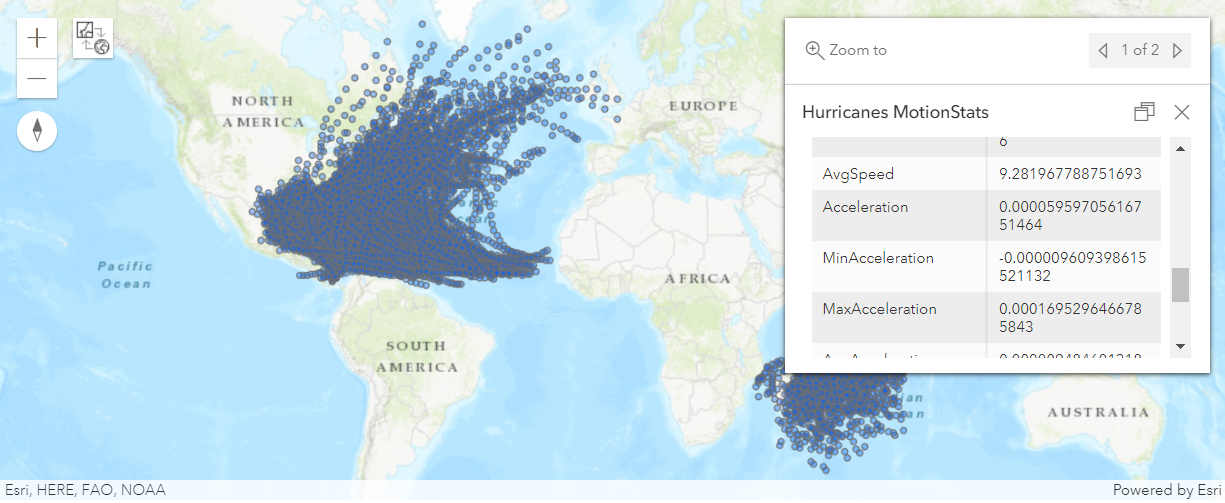

In this guide, we learned about data enrichment tools. In the next guide, we will learn how to manage big data using `arcgis.geoanalytics.manage_data`.